In [3]:
## https://cambridgespark.com/content/tutorials/convolutional-neural-networks-with-keras/index.html
## https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
from keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D,Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
import numpy as np

In [4]:
batch_size = 32 # in each iteration, we consider 32 training examples at once
num_epochs =  10 #200 # we iterate 200 times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 64 # ...switching to 64 after the first pooling layer
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
drop_prob_2 = 0.5 # dropout in the FC layer with probability 0.5
hidden_size = 512 # the FC layer will have 512 neurons

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() # fetch CIFAR-10 data

num_train, height, width, depth = X_train.shape # there are 50000 training examples in CIFAR-10 
num_test = X_test.shape[0] # there are 10000 test examples in CIFAR-10
num_classes = np.unique(y_train).shape[0] # there are 10 image classes

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= np.max(X_train) # Normalise data to [0, 1] range
X_test /= np.max(X_test) # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
def cnn_model():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)))    
    model.add(Conv2D(32, (3, 3), activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()
    
    return model

In [8]:
def cnn_model1():
    inp = Input(shape=(height, width, depth)) # depth goes last in TensorFlow back-end (first in Theano)
    # Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
    conv_1 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(inp)
    conv_2 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(conv_1)
    pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
    drop_1 = Dropout(drop_prob_1)(pool_1)
    # Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer)
    conv_3 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(drop_1)
    conv_4 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(conv_3)
    pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
    drop_2 = Dropout(drop_prob_1)(pool_2)
    # Now flatten to 1D, apply FC -> ReLU (with dropout) -> softmax
    flat = Flatten()(drop_2)
    hidden = Dense(hidden_size, activation='relu')(flat)
    drop_3 = Dropout(drop_prob_2)(hidden)
    out = Dense(num_classes, activation='softmax')(drop_3)

    model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers
    
    return model    

In [9]:
def plot_model(model_details):   # pass history

    # Create sub-plots
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_details.history['acc'])+1),model_details.history['acc'])
    axs[0].plot(range(1,len(model_details.history['val_acc'])+1),model_details.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_details.history['acc'])+1),len(model_details.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Summarize history for loss
    axs[1].plot(range(1,len(model_details.history['loss'])+1),model_details.history['loss'])
    axs[1].plot(range(1,len(model_details.history['val_loss'])+1),model_details.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_details.history['loss'])+1),len(model_details.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    
    # Show the plot
    plt.show()

In [14]:
import matplotlib.pyplot as plt
def plot_model1(model_details):
    plt.figure(figsize=[8,6])
    plt.plot(model_details.history['loss'],'r',linewidth=3.0)
    plt.plot(model_details.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)

    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(model_details.history['acc'],'r',linewidth=3.0)
    plt.plot(model_details.history['val_acc'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()
    

In [11]:
model = cnn_model1()

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

history = model.fit(X_train, Y_train,                # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
model.evaluate(X_test, Y_test, verbose=1)  # Evaluate the trained model on the test set!

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 385s - loss: 1.5435 - acc: 0.4378 - val_loss: 1.0936 - val_acc: 0.6088
Epoch 2/10
45000/45000 [==============================] - 380s - loss: 1.1351 - acc: 0.5953 - val_loss: 0.9257 - val_acc: 0.6760
Epoch 3/10
45000/45000 [==============================] - 378s - loss: 0.9764 - acc: 0.6552 - val_loss: 0.8186 - val_acc: 0.7162
Epoch 4/10
45000/45000 [==============================] - 395s - loss: 0.8759 - acc: 0.6916 - val_loss: 0.7300 - val_acc: 0.7476
Epoch 5/10
45000/45000 [==============================] - 4184s - loss: 0.8041 - acc: 0.7207 - val_loss: 0.7265 - val_acc: 0.7480
Epoch 6/10
45000/45000 [==============================] - 474s - loss: 0.7497 - acc: 0.7345 - val_loss: 0.7028 - val_acc: 0.7648
Epoch 7/10
45000/45000 [==============================] - 424s - loss: 0.7081 - acc: 0.7527 - val_loss: 0.6930 - val_acc: 0.7616
Epoch 8/10
45000/45000 [=======================

[0.72840133514404293, 0.74939999999999996]

In [12]:
score = model.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!
print("score::" , score)

 9984/10000 [============================>.] - ETA: 0sscore:: [0.72840133514404293, 0.74939999999999996]


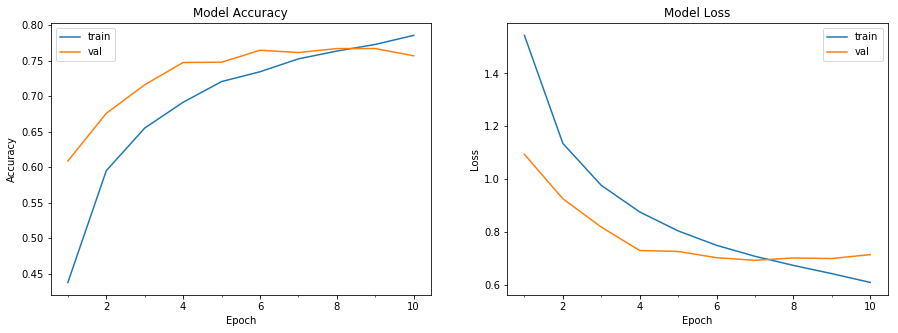

In [15]:
plot_model(model_details=history)

In [16]:
X_test[0,:].shape

(32, 32, 3)

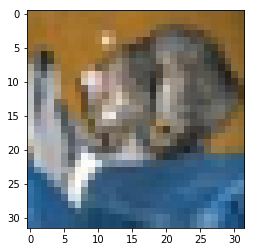

In [18]:
%matplotlib inline
plt.imshow(X_test[0,:].reshape(32,32,3))

In [19]:
print(Y_test[0,:])

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


In [20]:
pred = model.predict(X_test[0,:].reshape(1,32,32,3))

In [21]:
print('Label of testing sample:', np.argmax(Y_test[0,:]))

Label of testing sample: 3


In [22]:
print('\nOutput of the softmax layer:',pred[0])
print('\nNeural Network prediction:', np.argmax(pred[0]))


Output of the softmax layer: [  5.41414367e-04   1.39622671e-07   8.42888549e-04   5.47083020e-01
   5.39730652e-04   4.47064966e-01   3.56385508e-03   1.78570830e-04
   1.84178061e-04   1.19113076e-06]

Neural Network prediction: 3
